<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/atividade_pratica_04_%5BAlana%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkAFqFW7ctw8U6I5vGdPOpqFpnnExeAUOiIg&s" alt="drawing" width="300";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 04 - Análise de Dados Vetoriais



**Valor das questões:**
* plot 1 (20 pontos)
* questão (10 pontos)
* plot 2 (25 pontos)
* table 1 (20 pontos)
* plot 3 (25 pontos)


## Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.



## Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

As you complete this assignment, be sure to:

* Keep comments concise and strategic. Don't comment every line!
* Organize your code in a way that makes it easy to follow.
* Place ONLY the code needed to create a plot in the plot cells. Place additional processing code ABOVE that cell (in a separate code cell).
* Only include the package imports, code, packages, and outputs that are CRUCIAL to your homework assignment.

## Assignment Background

In this assignment, you will explore an area in California called the [San Joaquin Experimental Range](https://www.neonscience.org/field-sites/field-sites-map/SJER) known by the acronym SJER on the NEON Website. You will look at data from this area next week more closely next week when we discuss uncertainty and lidar data.

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/12459464).

To begin, add all of the needed package imports and set your working directory in the cells below.

In [23]:
# To begin, add all of the needed package imports and
#set your working directory in the cells below.

from google.colab import drive
drive.mount('/content/drive')

#Importing the needed libraries
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

# My path
my_path ='Colab Notebooks/spatial-vector-lidar/'
my_path = '/content/drive/MyDrive/' + my_path
os.chdir(my_path)
my_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/spatial-vector-lidar/'


## Plot 1 - Roads Map and Legend

The NEON **SJER** field site is located in California. Your first task is to explore the area by creating a map of California roads that has symbology that represents different road types.

### Open the roads layer, clip the data and create a geodataframe

1. Open the `california/madera-county-roads/tl_2013_06039_roads.shp` file located in your `spatial-vector-lidar` data download using GeoPandas.
2. Crop the geodataframe using the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`) layer. Name your clipped roads object: `sjer_roads_cl`.
3. Open the SJER plot locations data (`california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`). Name your SJER plot locations object: `sjer_plots`.
4. Create a map that shows the cropped madera roads layer, SJER plot locations and the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`).

### Important Notes:

1. Plot the roads so different **road types** are represented using unique symbology using the `RTTYP` attribute.
2. Add the plot locations to your map. Color each location according to the attribute **plot type** using unique symbology for each `plot_type` in the data.
3. Add a **title** to your plot.
4. Be sure that your plot legend is not covering your final map.
5. **IMPORTANT:** be sure that all of the data are within the same `EXTENT` and `crs` of the SJER boundary layer. This means that you  have to crop and reproject your data prior to plotting it!

### Warning to Ignore
**NOTE:** you can ignore the warning from pyproj: `'+init=<authority>:<code>' syntax is deprecated.`, which will be resolved by an update to GeoPandas in the next release.

In [24]:
# YOUR CODE HERE

# Question 1 - Open the california/madera-county-roads/tl_2013_06039_roads.shp file located in your spatial-vector-lidar data download using GeoPandas.
# Loading the data from San Joaquin Experimental Range (SJER)
roads = gpd.read_file(my_path + "california/madera-county-roads/tl_2013_06039_roads.shp")
roads.head()
sjer_boundary = gpd.read_file(my_path + "california/neon-sjer-site/vector_data/SJER_crop.shp")
sjer_plots = gpd.read_file(my_path + "california/neon-sjer-site/vector_data/SJER_plot_centroids.shp")

print(sjer_boundary)
print(sjer_plots)

# Just to be sure that all the data have the same CRS.
print(sjer_boundary.crs)
print(sjer_plots.crs)
roads = roads.to_crs(sjer_boundary.crs)
sjer_plots = sjer_plots.to_crs(sjer_boundary.crs)

# Question 2 - Crop the geodataframe using the SJER boundary (california/neon-sjer-site/vector_data/SJER_crop.shp) layer.
# Name your clipped roads object: sjer_roads_cl.
sjer_roads_cl = gpd.clip(roads, sjer_boundary)
print(sjer_roads_cl)

# Question 3 - Create a map that shows the cropped madera roads layer, SJER plot locations and the SJER boundary
#(california/neon-sjer-site/vector_data/SJER_crop.shp).
#sjer_boundary = gpd.read_file(my_path + "california/neon-sjer-site/vector_data/SJER_crop.shp")


   Id                                           geometry
0   0  POLYGON ((254570.567 4112361.92, 258867.409 41...
     Plot_ID   Point     northing     easting plot_type  \
0   SJER1068  center  4111567.818  255852.376     trees   
1    SJER112  center  4111298.971  257406.967     trees   
2    SJER116  center  4110819.876  256838.760     grass   
3    SJER117  center  4108752.026  256176.947     trees   
4    SJER120  center  4110476.079  255968.372     grass   
5    SJER128  center  4111388.570  257078.867     trees   
6    SJER192  center  4111071.087  256683.434     grass   
7    SJER272  center  4112167.778  256717.467     trees   
8   SJER2796  center  4111533.879  256034.390      soil   
9   SJER3239  center  4109856.983  258497.102      soil   
10    SJER36  center  4110161.674  258277.829     trees   
11   SJER361  center  4107527.074  256961.794     grass   
12    SJER37  center  4107578.841  256148.197     trees   
13     SJER4  center  4109767.289  257228.336     trees   
1

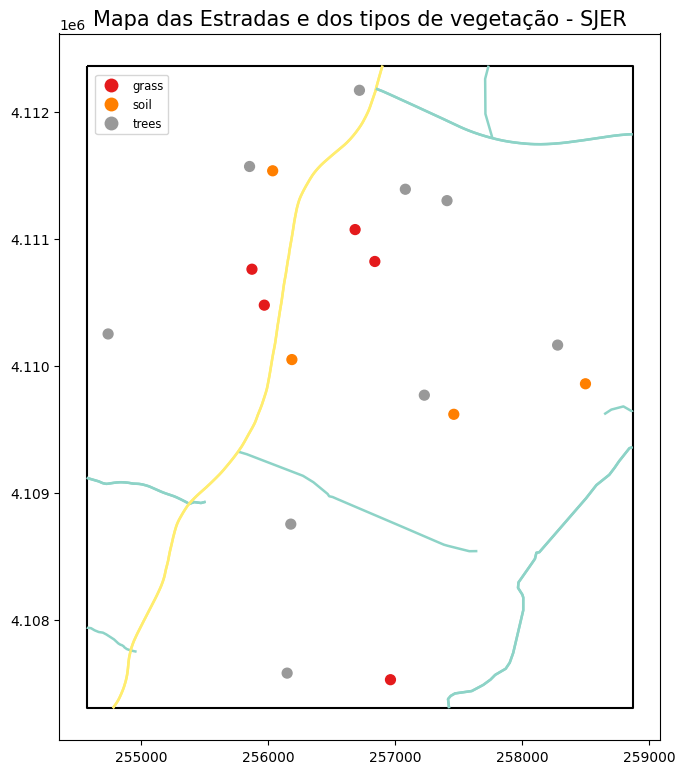

In [25]:
# PLOT 1 - Place only the code required to create a plot of your data here
# Additional processing code can go above this code cell
# Important: name your plots geodataframe: sjer_plots
# Important: name your clipped roads geodataframe: sjer_roads_cl

# Creating a map
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
sjer_boundary.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.5)

# Plota as estradas com cores diferentes baseadas em RTTYP
sjer_roads_cl.plot(ax=ax,column="RTTYP",legend=True,cmap="Set3", linewidth=1.8,
    legend_kwds={'loc': 'upper left',
        #'bbox_to_anchor': (1.05, 0.01),
        'title': 'Tipo de Estrada',
        'fontsize': 'small'}
)

# Ploting the plot_type
sjer_plots.plot(ax=ax,column="plot_type",cmap="Set1",markersize=50,
    legend=True,
    legend_kwds={'loc': 'upper left',
        'bbox_to_anchor': (0.05, 0.95),
        'fontsize': 'small'}
    #legend_kwds={'loc': 'lower left', 'title': 'Tipo de Estrada', 'fontsize': 'small'}
)

ax.set_title("Mapa das Estradas e dos tipos de vegetação - SJER", fontsize=15)
#ax.set_axis_off()
plt.tight_layout()
plt.show()



## Question

What does the RTTYP road type acronyms **M** and **S** stand for?
Please your answer in the markdown cell BELOW.

HINT: use the `tl_2013_06039_roads.shp.xml` file in your data download to help you figure out the answer to this question
HINT2: you can also find good results using google (on the column name)!

YOUR ANSWER HERE

## Inside the `file tl_2013_06039_roads.shp.xml` we can see:

In the TIGER/Line road dataset, the RTTYP (Route Type) field uses single-letter codes to denote the type of route. Specifically:
www2.census.gov
<onlink>http://www2.census.gov/geo/tiger/TIGER2013/ROADS/tl_2013_06039_roads.zip</onlink>

M: Common Name – Indicates a road segment known by a common or local name.

S: State Recognized – Denotes a road segment officially recognized by the state.

In [26]:
# Skip this cell

## Plot 2 - Roads in Del Norte, Modoc & Siskiyou Counties

Create a plot of roads that are located in: Del Norte, Modoc & Siskiyou Counties. To do this, you will need the following layers:

* Counties in California: `california/CA_Counties/CA_Counties_TIGER2016.shp`
* Roads: `global/ne_10m_roads/ne_10m_roads.shp`

To create this plot, you will need to:

1. Select the three counties that you want to work with in the counties dataset. One fast way to do this is using syntax as follows:

`roads_df[roads_df['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]`

Name your county boundaries object: `three_counties`.

2. Clip the roads data to the boundary of the counties that you wish to look at.
3. Assign each road segment an attribute that identifies it as within each county.

Color the roads in each county using a unique color.

HINT: use the `legend=True` argument in `.plot()` to create a legend.
Because you are only creating a legend for one layer, you can quickly use `.plot()`
rather than `ax.legend()` which is what you used above!


### IMPORTANT:

* Name your final county boundaries object: `three_counties`.
* Both layers need to the in the SAME coordinate reference system for you to work with them together. REPROJECT both data layers to albers `.to_crs(epsg=5070)`
* Clip the roads to the boundary of the three_counties layer that you created which only contains the 3 selected counties: `"Siskiyou", "Modoc", "Del Norte"`
* To assign each road to its respective county, you will perform a spatial join using `.sjoin()`.
* You will need to redefine the CRS of the roads layer, after the clip, which you can do using something like:

```county_roads.crs = ca_cty_albers.crs```

**NOTE:** you can ignore the warning from pyproj: `'+init=<authority>:<code>' syntax is deprecated.`, which will be resolved by GeoPandas in the next release.

In [27]:
# YOUR CODE HERE
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

counties = gpd.read_file(my_path + 'california/CA_Counties/CA_Counties_TIGER2016.shp')
roads = gpd.read_file(my_path + 'global/ne_10m_roads/ne_10m_roads.shp')
print(counties.crs)
print(roads.crs)

# Since counties.crs=> EPSG:3857 and roads.crs=> EPSG:4326, lets REPROJECT to epsg=5070
counties_albers = counties.to_crs(epsg=5070)
roads_albers = roads.to_crs(epsg=5070)

# === Question 1 ===
three_counties = counties_albers[counties_albers['NAME'].isin(['Siskiyou', 'Modoc', 'Del Norte'])]
#print(three_counties)

# === Question 2 ===
roads_clip = gpd.clip(roads_albers, three_counties)
print("CRS após o comando CLIP ===> ", roads_clip.crs)
# === assigning each road to its respective county, you will perform a spatial join using .sjoin()
roads_with_county = gpd.sjoin(roads_clip, three_counties, how="inner", predicate="intersects")


EPSG:3857
EPSG:4326
CRS após o comando CLIP ===>  EPSG:5070


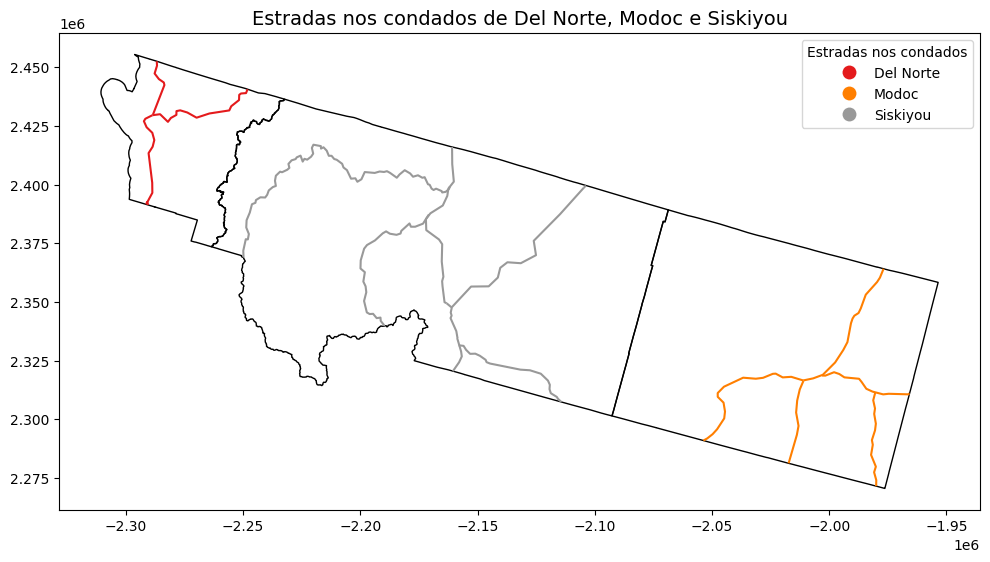

In [28]:
# PLOT 2 - Place only the code required to plot your data here
# Additional processing code can go above this code cell
# Important: name your final geodataframe for county boundaries: three_counties

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 8))
three_counties.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
roads_with_county.plot(
    ax=ax,
    column='NAME',
    cmap='Set1',
    legend=True,
    linewidth=1.5,
    legend_kwds={'title': 'Estradas nos condados'}
)
ax.set_title('Estradas nos condados de Del Norte, Modoc e Siskiyou', fontsize=14)
#ax.set_axis_off()
plt.tight_layout()
plt.show()


## Table 1 - Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a geodataframe that shows the total length of road in these counties used in plot 2: Siskiyou, Modoc, and Del Norte. To calculate this, use the data you created for plot 2.

To calculate length of each line in your geodataframe, you can use the syntax `gdf.length`. Create a new column using the syntax:

`gdf["length"] = gdf.length`

You can summarize the data to calculate total length using pandas `.groupby()` on the county column name.

Note: you can use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.

IMPORTANT: Name your final summary GeoDataframe: `cali_roads_summary`.

it should look something like this:


||length|
|----|----|
|NAME||
|Del Norte| road length here|
|Modoc| road length here|
|Siskiyou| road length here|


In [29]:
# TABLE 1 - Place the code required to create the dataframe
# Important: name your final geodataframe: cali_roads_summary

# YOUR CODE HERE
import pandas as pd

# Calculating the length for each segment
roads_with_county['length'] = roads_with_county.geometry.length
print( roads_with_county.geometry.length)

cali_roads_summary = roads_with_county.groupby('NAME')['length'].sum().to_frame()
pd.options.display.float_format = '{:.4f}'.format
print(cali_roads_summary)

from tabulate import tabulate
cali_roads_summary_reset = cali_roads_summary.reset_index()
print(tabulate(cali_roads_summary_reset, headers=['Condados (counties)', 'Comprimento(length) em metros'], tablefmt='fancy_grid', showindex=False, floatfmt=".2f"))




1135      36231.862532
49044     54531.625853
48916     41257.287091
52        64535.773686
3767      15445.147735
48926     40843.241547
3766      16623.818062
1003      62161.242084
48954     75847.324229
48977    149742.894023
3768       1401.355859
1479      84780.254759
1533      75456.948502
60        42892.583860
59        51300.610164
1434         25.135672
1427      25687.776269
dtype: float64
               length
NAME                 
Del Norte 121307.4618
Modoc     245029.4069
Siskiyou  472428.0132
╒═══════════════════════╤═════════════════════════════════╕
│ Condados (counties)   │   Comprimento(length) em metros │
╞═══════════════════════╪═════════════════════════════════╡
│ Del Norte             │                       121307.46 │
├───────────────────────┼─────────────────────────────────┤
│ Modoc                 │                       245029.41 │
├───────────────────────┼─────────────────────────────────┤
│ Siskiyou              │                       472428.01 │
╘═══

## Plot 3 - Global Total Estimated Population and Mean Population Rank

Create a plot of quantile maps of global estimated population by region. To do this, you will use the following layers:

1. Download the natural earth data:
*  [click here](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip)
* access the [Natural Earth website](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/) under the *1:10 cultural vectors*, and then *Download countries* from the first section (*Admin 0 – Countries*).

The URL below might look odd as it has two "http" strings in it, but it is how the url's are organized on natural earth and should work.

Recall that using `et.data.get_data(url=url)` will download the data to the following directory: `earth-analytics/data/earthpy-downloads/`

After you have downloaded the data, import the data and
1. subset the data to include the following columns: `["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']`
2. Dissolve the data by region (`REGION_WB`) column and aggregate by `sum` and `mean`.
    * HINT: you can provide the aggfun= argument with a `[list]` of function names in quotes and it will summarize numeric columns using each function.
3. Create a figure with two plots:  
    * a. Plot 1 - sum estimated population (`POP_EST`) by region.
    * a. Plot 2 - mean population rank (`POP_RANK`) by region.
    
**NOTE:** you can ignore the warning from merge: `UserWarning: merging between different levels can give an unintended result`.

In [30]:
import geopandas as gpd
import numpy as np
import os

# Carregar o shapefile
from google.colab import drive
drive.mount('/content/drive')

# My path
my_path ='Colab Notebooks/ne_10m_admin_0_countries/'
my_path = '/content/drive/MyDrive/' + my_path
os.chdir(my_path)
my_path
countries = gpd.read_file(my_path+ "/ne_10m_admin_0_countries.shp")
print(countries.crs)

# Question 1:
columns = ["REGION_WB", "CONTINENT", "POP_RANK", "POP_EST", "geometry"]
countries = countries[columns]
print(countries)

# Question 2: Dissolve the data by region (REGION_WB) column and aggregate by sum and mean.
regions = countries.dissolve(by="REGION_WB", aggfunc={"POP_EST": "sum", "POP_RANK": "mean"})
print(regions)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
EPSG:4326
                     REGION_WB      CONTINENT  POP_RANK        POP_EST  \
0          East Asia & Pacific           Asia        17 270625568.0000   
1          East Asia & Pacific           Asia        15  31949777.0000   
2    Latin America & Caribbean  South America        14  18952038.0000   
3    Latin America & Caribbean  South America        14  11513100.0000   
4    Latin America & Caribbean  South America        15  32510453.0000   
..                         ...            ...       ...            ...   
253        East Asia & Pacific           Asia        11    640445.0000   
254        East Asia & Pacific        Oceania         1         0.0000   
255  Latin America & Caribbean  North America         1         0.0000   
256  Latin America & Caribbean  North America         1         0.0000   
257        East Asia & Pacific           Asia  

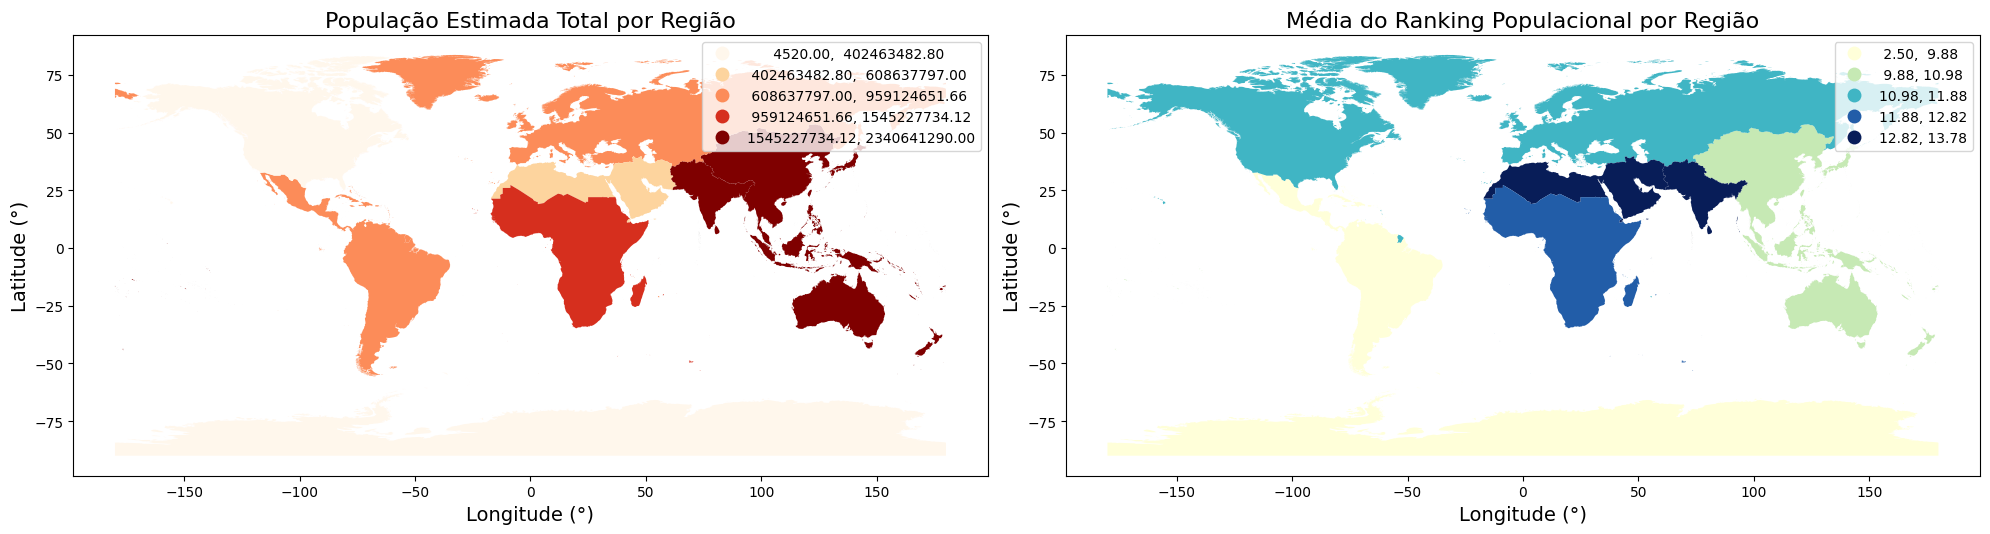

In [31]:
# PLOT 3 - Place only the code required to plot your data here
# Additional processing code can go above this code cell

# Important: name your final geodataframe: mean_region_val

# YOUR CODE HERE
# Question 3:
import matplotlib.pyplot as plt

regions = regions.to_crs(epsg=4326)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Map 1:
regions.plot(column="POP_EST", cmap="OrRd", scheme="quantiles", legend=True, ax=axes[0])
axes[0].set_title("População Estimada Total por Região", fontsize=16)
axes[0].set_xlabel("Longitude (°)", fontsize=14)
axes[0].set_ylabel("Latitude (°)", fontsize=14)
axes[0].set_aspect('equal')

# Map 2:
regions.plot(column="POP_RANK", cmap="YlGnBu", scheme="quantiles", legend=True, ax=axes[1])
axes[1].set_title("Média do Ranking Populacional por Região", fontsize=16)
axes[1].set_xlabel("Longitude (°)", fontsize=14)
axes[1].set_ylabel("Latitude (°)", fontsize=14)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()